In [19]:
import matplotlib.pyplot as plt
import json
import requests
import numpy as np
%matplotlib inline

In [13]:
def get_temp(elem):
    return elem['Measurements']['Temperature']['value']

def get_timestamp(elem):
    return elem['Timestamp']

In [12]:
URL_TEMPLATE = "https://apigtw.vaisala.com/hackjunction2018/saunameasurements/history?SensorID={}&before={}&after={}"
sensor_id = "Bench1"
now =   1543000342000
start = 1542924742000
delta = 3600000
for timestamp in range(start, now, delta):
    before = timestamp + delta
    after = timestamp
    response = requests.get(URL_TEMPLATE.format(sensor_id, before, after))
    with open("data/temperature_{}_{}_{}.csv".format(sensor_id, before, after), "w") as file:
        file.write(response.text)

# data = json.loads(response.text)

In [39]:
timestamps_all = []
temps_all = []

for timestamp in range(start, now, delta):
    with open("data/temperature_{}_{}_{}.csv".format(sensor_id, before, after), "r") as file:
        json_data = json.load(file)
#     assert len(timestamps_all) == len(temps_all)
#     if len(json_data) > 0:
    timestamps_curr = list(reversed([get_timestamp(x) for x in json_data]))
    temps_curr = list(reversed([get_temp(x) for x in json_data]))

    assert len(timestamps_curr) == len(temps_curr)
    if len(timestamps_curr) > 0:
        timestamps_all.append(timestamps_curr)
        temps_all.append(temps_curr)

timestamps_all = np.concatenate(timestamps_all)
temps_all = np.concatenate(temps_all)

In [9]:
size = 0
with open("temperature_Bench1_1538910942000_1537910942000.csv", "r") as f:
    size = len(json.load(f))


In [10]:
size

0

In [4]:
ja

README.md                                          temperature_Bench1_1535910942000_1534910942000.csv temperature_Bench1_1539910942000_1538910942000.csv
load.ipynb                                         temperature_Bench1_1536910942000_1535910942000.csv temperature_Bench1_1540910942000_1539910942000.csv
temperature_Bench1_1533910942000_1532910942000.csv temperature_Bench1_1537910942000_1536910942000.csv temperature_Bench1_1541910942000_1540910942000.csv
temperature_Bench1_1534910942000_1533910942000.csv temperature_Bench1_1538910942000_1537910942000.csv temperature_Bench1_1542910942000_1541910942000.csv


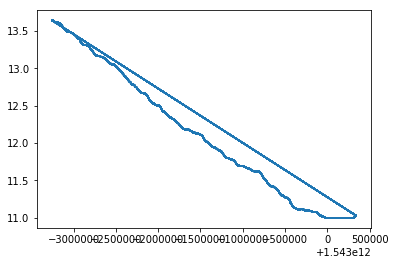

In [43]:
plt.plot(timestamps_all, temps_all)